# Import Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
import os

In [13]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('cmudict')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

# Data Load

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/text.csv')

In [16]:
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


# Data Preprocessing

## Data Cleaning

In [17]:
df.columns

Index(['Unnamed: 0', 'text', 'label'], dtype='object')

The dataset currently has three columns: 'Unnamed: 0', 'Text', and 'Label'. Since the '**Unnamed: 0**' column is unnecessary, we are dropping it to simplify the dataset.

In [18]:
# Drop the 'Unnamed: 0' column from the DataFrame, which is typically an index column
df.drop(columns='Unnamed: 0', inplace=True)

In [19]:
# Check for duplicate rows in the DataFrame and return the total count of duplicates
df.duplicated().sum()

686

The result of **df.duplicated().sum()** shows that **686** duplicate rows were found in the dataset. Duplicates in a dataset can lead to biased results, skewed analysis, and may affect model performance by over-representing repeated data. By removing these duplicates, we ensure that each data point contributes uniquely to the analysis or model training. This step is crucial to maintain the integrity and accuracy of the dataset, avoiding the overemphasis on certain observations and ensuring that all rows contribute equally.

In [20]:
# removing the duplicates
df = df.drop_duplicates()
# Check for duplicate rows in the DataFrame and return the total count of duplicates
df.duplicated().sum()

0

In [21]:
# Checking is there any 'NAN' values in the dataset
df[df.isna().any(axis=1)]

,text,label


## Checking and Mapping 'label' Column

We are performing two key steps to process the 'label' column for better data visualization:

Checking Unique Values in the 'label' Column:

We first check the unique values present in the 'label' column using **df['label'].unique()**. This helps us understand the possible categories in the label column and ensures that we are working with a manageable set of values for classification or visualization purposes.

The unique values in the 'label' column are numerical categories, which represent different emotions.

Mapping Numerical Labels to Emotional Categories:

The numerical labels (e.g., 0, 1, 2, 3, 4, 5) represent specific emotions, and we map them to more meaningful labels for better interpretability:


* 0: sadness
* 1: joy
* 2: love
* 3: anger
* 4: fear
* 5: surprise

We map these numerical labels to their corresponding emotion categories using the emotion_label_mapping dictionary. This is done using the function df['label'].map(emotion_label_mapping), which replaces the numerical labels with their respective emotional labels.

By mapping the numerical labels to emotions, we make the data more understandable and suitable for analysis and visualization, allowing for clearer insights into the dataset's content.

In [22]:
# Check unique values in the 'label' column
unique_values = df['label'].unique()

print("Unique values in the 'label' column:", unique_values)

Unique values in the 'label' column: [4 0 2 1 5 3]


In [23]:
# Define a mapping for numerical labels to emotional categories
emotion_label_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

# Map the numerical labels in the 'label' column to corresponding emotion names
df['label'] = df['label'].map(emotion_label_mapping)
df

,text,label
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sadness
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sadness
4,i am a kindergarten teacher and i am thoroughl...,fear
...,...,...
416804,i feel like telling these horny devils to find...,love
416805,i began to realize that when i was feeling agi...,anger
416806,i feel very curious be why previous early dawn...,surprise
416807,i feel that becuase of the tyranical nature of...,anger


In [24]:
# Check unique values in the 'label' column
unique_values = df['label'].unique()

print("Unique values in the 'label' column:", unique_values)

Unique values in the 'label' column: ['fear' 'sadness' 'love' 'joy' 'surprise' 'anger']


## Data Visualisation

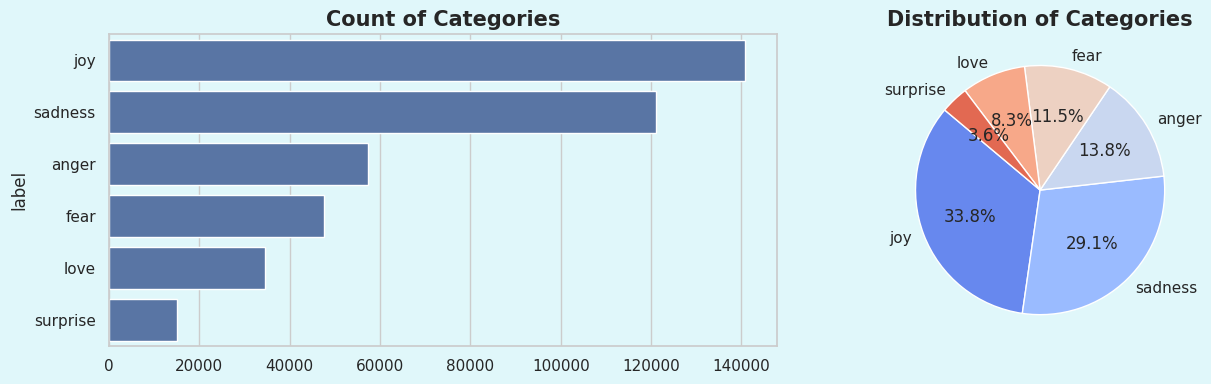

In [25]:
# Value count of 'label'
count = df['label'].value_counts()

# Set the background color and theme
background_color = '#e0f7fa'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 4), facecolor=background_color)

# Plot horizontal bar chart on the first subplot
palette = sns.color_palette("coolwarm", len(count))
sns.set_palette(palette)
sns.barplot(x=count.values, y=count.index, ax=axs[0], orient='h')
axs[0].set_title('Count of Categories', fontsize=15, fontweight='bold')

# Plot pie chart on the second subplot
axs[1].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[1].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Cleaning Text Data by Detecting Chat Abbreviations

We are detecting specific chat words or abbreviations commonly used in online communication, such as "LOL" for "Laughing Out Loud" or "BRB" for "Be Right Back." These terms are often used to convey emotions or express feelings in a concise way.

We use a dictionary (now renamed as chat_abbreviations) to define a list of common abbreviations and their full meanings. The goal is to identify any of these abbreviations in the text column and return a list of unique matches that occur in the dataset. This allows us to potentially correlate these abbreviations with the emotions in the label column.

**Process:**

1. We create a regular expression pattern based on the abbreviations in chat_abbreviations.
2. We iterate over each row in the text column to find all occurrences of these abbreviations.
3. We collect the unique abbreviations found across all texts and store them in a set to eliminate duplicates.
4. Finally, we convert the set of unique matches to a sorted list and display them.

**Why We Are Doing This:**
Detecting chat abbreviations can help us understand the types of emotions being conveyed in a more informal, casual manner. Some abbreviations like "ASAP" (As Soon As Possible) or "OMG" (Oh My God) may be associated with specific emotions, such as urgency or surprise, which could further aid in the analysis of sentiment or emotional tone in the dataset.

**Result:**
In this case, after checking through the dataset, there are no such words from the chat_abbreviations list detected in the text data, meaning the abbreviations we defined weren't used in the dataset's text entries.

In [26]:
# Updated chat abbreviations dictionary
chat_abbreviations = {
    "143": "I Love You",
    "2DAY": "Today",
    "4EVA": "Forever",
    "4NR": "Foreigner",
    "4U": "For You",
    "7K": "Sick:-D Laugher",
    "A3": "Anytime, Anywhere, Anyplace",
    "ADIH": "Another Day in Hell",
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "AKA": "Also Known As",
    "AMOF": "As a Matter of Fact",
    "ASAP": "As Soon As Possible",
    "ASL": "Age, Sex, Location",
    "ATM": "At The Moment",
    "ATK": "At The Keyboard",
    "B2W": "Back to Work",
    "BAE": "Before Anyone Else",
    "BAK": "Back At Keyboard",
    "BBS": "Be Back Soon",
    "BBL": "Be Back Later",
    "BF": "Boyfriend",
    "BFN": "Bye For Now",
    "BFF": "Best Friends Forever",
    "BRT": "Be Right There",
    "BRB": "Be Right Back",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "BSAAW": "Big Smile and a Wink",
    "BWL": "Bursting With Laughter",
    "CU": "See You",
    "CYA": "See You",
    "CSL": "Can't Stop Laughing",
    "CUL8R": "See You Later",
    "DM": "Direct Message",
    "DW": "Don't Worry",
    "FC": "Fingers Crossed",
    "FAQ": "Frequently Asked Questions",
    "FIMH": "Forever In My Heart",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GM": "Good Morning",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "GTFO": "Get The F... Out",
    "GTG": "Got To Go",
    "HBD": "Happy Birthday",
    "IDC": "I Don't Care",
    "IDK": "I Don't Know",
    "IFYP": "I Feel Your Pain",
    "IC": "I See",
    "ICQ": "I Seek You (also a chat program)",
    "ILY": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IMU": "I Miss You",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "IYKYK": "If You Know, You Know",
    "JK": "Just Kidding",
    "K": "Okay",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "M8": "Mate",
    "MFW": "My Face When",
    "MRW": "My Reaction When",
    "MTE": "My Thoughts Exactly",
    "NM": "Not Much",
    "NP": "No Problem",
    "NRN": "No Reply Necessary",
    "NVM": "Never Mind",
    "OIC": "Oh, I See",
    "OMG": "Oh My God",
    "OMW": "On My Way",
    "PITA": "Pain In The A..",
    "PLZ": "Please",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "RT": "Retweet",
    "SMH": "Shaking My Head",
    "SK8": "Skate",
    "SNH": "Sarcasm Noted Here",
    "STATS": "Your Sex and Age",
    "TBH": "To Be Honest",
    "TFW": "That Feeling When",
    "THX": "Thank You",
    "TIME": "Tears In My Eyes",
    "TMI": "Too Much Information",
    "TNTL": "Trying Not To Laugh",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "TY": "Thank You",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours Forever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "WYWH": "Wish You Were Here",
    "YOLO": "You Only Live Once",
    "ZZZ": "Sleeping, Bored, Tired"
}

In [27]:
# Function to check for any chat abbreviations words and return unique matches
def check_chat_words(text):
    # Create a regex pattern by joining all chat words
    pattern = r'\b(' + '|'.join(chat_abbreviations.keys()) + r')\b'
    # Find all chat abbreviations words in the text
    matches = re.findall(pattern, text)
    # Return unique matches
    return matches

# Collect all unique matches from all rows in the dataset
all_matches = set()
for text in df['text']:
    matches = check_chat_words(text)
    all_matches.update(matches)

# Convert the set to a sorted list (optional)
unique_matches = sorted(list(all_matches))

# Display the result
print(unique_matches)

[]


## Checking for Non-Alphabetic Characters in Text

In this step, we are examining whether any rows in the dataset contain non-alphabetic characters or symbols (excluding spaces). We use a regular expression to detect any character that is not a letter (a-z, A-Z) or a space. This allows us to identify any unwanted elements like punctuation, numbers, or special symbols that may interfere with our text analysis.

Why is this important?


1. **Data Cleaning:** Non-alphabetic characters can create noise in the data, making it harder to interpret and analyze.
2. **Accuracy:** When working with text analysis, such as sentiment or emotion detection, it's crucial to eliminate irrelevant characters to ensure the model focuses on meaningful words.

By ensuring only relevant, clean text remains, we improve the quality of our analysis and the accuracy of our results. In the context of emotion detection, cleaning up the text helps in correctly identifying the underlying emotions conveyed.

**Result:** After checking, we can confirm that there are no rows with non-alphabetic characters or symbols, meaning the text data is already clean and ready for further processing.

In [28]:
# Check if any row contains non-alphabetic characters or spaces
rows_with_non_alpha = df[df['text'].str.contains(r'[^a-zA-Z\s]', regex=True)]

# Show the rows that match the condition
print(rows_with_non_alpha.head())

Empty DataFrame
Columns: [text, label]
Index: []


## Identifying and Removing Stopwords

In this step, we are focusing on stopwords, which are common words like "the," "is," and "in" that don't carry significant meaning in text analysis. Stopwords can interfere with detecting meaningful patterns, especially when analyzing emotions. By identifying rows that contain stopwords and removing them, we can improve the quality of our text data for emotion detection.

What are we doing?


1. **Identifying Stopwords:** We check if any row in the dataset contains stopwords. We use a list of common English stopwords and search for them in each row of the text column.
2. **Removing Stopwords:** Once we identify rows containing stopwords, we remove them from the text, leaving only meaningful words for further analysis.

Why is this important?


1. **Improving Text Quality:** Stopwords don't provide meaningful insight, so eliminating them helps focus on more relevant terms.
2. **Enhancing Emotion Detection:** Emotion detection models rely on significant keywords. Removing stopwords ensures the model analyzes the most relevant words, improving accuracy.
3. **Improved Emotional Clarity:** By eliminating stopwords, the text becomes more focused on key emotional cues, helping to better identify feelings like joy, fear, anger, or sadness.
4. **Streamlined Processing:** Removing stopwords reduces unnecessary complexity, making it easier to process the text for emotion-related patterns and reducing computational overhead.
5. **Boosted Emotion Detection Accuracy:** Stopwords can dilute the strength of emotional signals in text. Removing them ensures that the model identifies the primary emotions with greater precision.
6. **Clearer Emotional Interpretation:** The text becomes clearer after stopwords are removed, making it easier to interpret the emotions conveyed, whether it’s a happy, angry, or fearful sentiment.

**Result:** After checking, we find that 414302 rows contain stopwords, and we perform the operation to remove them. This operation helps clean up the text for more effective emotion detection and ensures that the analysis focuses on key terms.

In [29]:
nltk.download('stopwords')
# Get the list of stopwords in English
stopwords_list = stopwords.words('english')

# Check if any row contains stopwords
rows_with_stopwords = df[df['text'].apply(lambda x: any(word in stopwords_list for word in x.split()))]

# Show the rows that contain stopwords
print(len(rows_with_stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


414302


In [30]:
# Get the list of stopwords in English
stopwords_list = stopwords.words('english')

# Remove stopwords from the text
df["text"] = df['text'].apply(lambda text: ' '.join([word for word in text.split() if word not in stopwords_list]))

# Check the updated DataFrame
df.head()

,text,label
0,feel really helpless heavy hearted,fear
1,ive enjoyed able slouch relax unwind frankly n...,sadness
2,gave internship dmrg feeling distraught,fear
3,dont know feel lost,sadness
4,kindergarten teacher thoroughly weary job take...,fear


## Standardizing Text by Lowercasing

In this step, we convert all text to lowercase, ensuring that the text data is standardized and consistent. This is an essential preprocessing step in natural language processing (NLP) tasks, especially for emotion detection.

What are we doing?


1. **Lowercasing the Text:** We convert all the text in the 'text' column to lowercase. This removes case sensitivity, so words like "Happy" and "happy" are treated as the same word.
2. **Displaying the Result:** After converting the text, we display the first few rows of the updated dataset to check the changes.

  
Why is this important?

1. **Improved Standardization:** Our dataset contains rows with mixed-case text, such as "Happy" and "happy." Lowercasing ensures uniformity, eliminating inconsistencies caused by varying cases for the same word.
2. **Enhanced Accuracy:** Lowercasing helps the model recognize that "Happy" and "happy" are the same word, ensuring accurate emotion detection without being misled by case differences.
3. **Better Emotion Detection:** Emotion detection models rely on the presence of specific words to determine sentiment. By standardizing the case, we improve the model’s ability to recognize emotional words without missing any due to case discrepancies.
4. **Easier Text Processing:** Lowercasing simplifies further text processing tasks like tokenization, stemming, and matching, enabling the model to focus on the meaning of words rather than their casing.


Importance of Lowercasing:

* **Consistency in Text:** The dataset contains a mix of upper and lowercase characters, which could cause unnecessary confusion. Lowercasing ensures that we treat every instance of a word (regardless of its case) in the same way, which is essential for accurate analysis.
* **Simplified Matching:** By converting the entire text to lowercase, we ensure that our matching algorithms can find words consistently, improving the accuracy of emotion detection tasks.


In [31]:
df['text'] = df['text'].str.lower()
df.head()

,text,label
0,feel really helpless heavy hearted,fear
1,ive enjoyed able slouch relax unwind frankly n...,sadness
2,gave internship dmrg feeling distraught,fear
3,dont know feel lost,sadness
4,kindergarten teacher thoroughly weary job take...,fear


## Remove New Line

What we are doing here:
* **Check for Newlines:** We apply a lambda function to each row's text to check if it contains the newline character (\n).
* **Output:** The rows that contain newline characters are captured in rows_with_newlines, and the total number of such rows is printed.

Why is this important?
* **Text Consistency:** Newlines can disrupt the structure of the data, especially for analysis tasks like sentiment analysis or emotion detection. Identifying and removing them can ensure that the text is clean and consistent.
* **Data Cleaning:** Newlines are often a result of formatting errors or extra spaces in the data and may not contribute to the meaningful analysis, so identifying and cleaning them helps improve the quality of the data.

In [32]:
# Check if any row contains newline characters
rows_with_newlines = df[df['text'].apply(lambda x: '\n' in x)]

# Print the number of rows that contain newlines
print(f"Number of rows with newline characters: {len(rows_with_newlines)}")

Number of rows with newline characters: 0


## Removing Numberic values from Text

In this step, we check if any row contains numerical digits within the text data to assess if there are any distractions or irrelevant elements in the dataset.
What Are We Doing?
* **Checking for Numbers:** Instead of removing numbers, we are now checking if there are any rows in the 'text' column that contain numerical digits. We use a regular expression (r'\d+') to identify rows that include any form of numbers (e.g., "123", "4", "56").

* **Displaying the Rows:** After performing this check, we display the rows that contain numerical digits. This allows us to inspect and confirm whether numbers are present in the dataset, and if they might influence further analysis or need to be handled in a different way.

Why is This Important?
1. **Data Consistency:** Detecting numbers helps identify any inconsistencies in the text that might skew the analysis. If numbers aren't relevant to the task (such as emotion detection), recognizing them early ensures we can focus only on meaningful textual content.
2. **Assessing Relevance:** Identifying rows with numbers helps us understand whether numerical values need to be removed or handled differently. In tasks like sentiment analysis or emotion detection, numbers are typically irrelevant and could distract the model from the actual content.
3. **Improved Data Quality:** By checking for digits, we can clean the dataset more effectively. We can decide if numbers should be removed or if they play a significant role in the text. This makes the dataset more suited to the intended analysis.
4. **Better Model Focus:** Ensuring that the data contains only the most relevant textual information helps improve the focus of the emotion detection model. Numbers that do not add value to the emotional tone of the text can be removed to enhance performance.

**Result:**
After running the check, we found that there are no rows with numeric data in the dataset.

In [33]:
# Check if any row contains digits
rows_with_digits = df[df['text'].str.contains(r'\d+', regex=True)]

# Show the rows that contain digits
rows_with_digits.head()

,text,label


## Checking for Special Characters or Punctuation

In this step, we check for any special characters or punctuation marks in the text data to ensure that the dataset is free of unnecessary or irrelevant elements that might affect further analysis.

What Are We Doing?
* **Checking for Special Characters:** We are using a regular expression (r'[^\w\s]') to identify any rows in the 'text' column that contain special characters or punctuation marks. This includes symbols like commas, periods, exclamation marks, etc.
* **Displaying the Rows:** After performing the check, we display the rows that contain special characters or punctuation marks. This helps us identify any extraneous elements that could disrupt the analysis or need to be handled separately.

Why is This Important?
1. **Data Consistency:** Special characters or punctuation marks can introduce noise into the text, making the dataset inconsistent and harder to analyze. By identifying these characters, we can decide if they need to be removed, improving the quality of the data.
2. **Improved Text Processing:** Removing or handling special characters is crucial for tasks like tokenization and feature extraction. It ensures that the text is clean and structured for further analysis, especially for tasks like emotion detection where punctuation might not contribute meaningfully.
3. **Enhanced Model Performance:** Special characters and punctuation can confuse models, especially those focused on sentiment or emotion analysis. By detecting them, we can clean the data and ensure that the model focuses on relevant words.
4. **Better Data Quality:** Identifying and removing unnecessary punctuation ensures that only the most relevant text data is used in the analysis, which helps improve the accuracy of any models applied.

**Result:**
After running the check, we found no rows that contain special characters or punctuation.

In [34]:
# Check if any row contains special characters or punctuation (anything that is not a word character or whitespace)
rows_with_special_chars = df[df['text'].str.contains(r'[^\w\s]', regex=True)]

# Show the rows that contain special characters or punctuation
rows_with_special_chars.head()

,text,label


In [35]:
# Check if any row in the 'text' column contains punctuation
rows_with_special_chars = df[df['text'].str.contains(f"[{re.escape(string.punctuation)}]", regex=True)]

# Show the rows that contain special characters or punctuation
rows_with_special_chars.head()

,text,label


## Identifying and Removing URLs

In this step, we check for any URLs (web addresses) in the text data to ensure the dataset contains only relevant textual information, free from external links that might affect the analysis. If any URLs are found, we remove them from the text data to maintain focus on the actual content. This ensures the analysis is not distracted by irrelevant web links and allows for more accurate interpretation of the text.

What Are We Doing?
* **Checking for URLs:** We use a regular expression (r'http\S+') to identify any rows in the 'text' column that contain URLs, specifically those starting with "http" or "https". This helps us isolate text data that might be cluttered with links.
* **Displaying the Rows:** After performing the check, we display the rows containing URLs. In this case, we identified 156 rows that have URLs, which may not contribute to emotion detection or analysis.
* **Removing URLs:** We then remove these URLs from the text by replacing them with an empty string using the str.replace method. This ensures that only the core content of the text is left for analysis.

Why is This Important?
1. **Data Clarity:** URLs often do not contribute meaningful information to text analysis. Removing them clarifies the text, allowing the analysis to focus on the content that carries emotional or sentiment-related meaning.
2. **Relevance to Analysis:** URLs are typically not relevant for tasks like emotion detection or sentiment analysis. By eliminating them, we ensure that the model analyzes only the actual words that convey emotions.
3. **Improved Model Performance:** URLs could confuse emotion detection models, leading to misinterpretation of the text. Removing them simplifies the dataset and helps improve the model's ability to learn meaningful patterns from the text.
4. **Enhanced Readability:** Clean text, free of URLs, is easier to read and understand, both for human analysts and machine learning models, making it more suitable for sentiment and emotion analysis tasks.

**Result:**
After running the operation, the URLs have been successfully removed from the text, leaving a cleaner dataset that is more focused on the actual content for further analysis.

In [36]:
# Check if any row contains URLs (http or https)
rows_with_urls = df[df['text'].str.contains(r'http\S+', regex=True)]

# Show the rows that contain URLs
rows_with_urls.head()

,text,label
3022,power make another want reality feel threatene...,fear
4871,someone great becos feel shitty everyday livin...,sadness
6620,feel horny want sxual encounter mumbai india i...,love
11553,feel honoured got far aly hodge pluspoint href...,joy
13997,feel anxious unprepared sit front rooms across...,fear


In [37]:
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)
print(df.head())

                                                text    label
0                 feel really helpless heavy hearted     fear
1  ive enjoyed able slouch relax unwind frankly n...  sadness
2            gave internship dmrg feeling distraught     fear
3                                dont know feel lost  sadness
4  kindergarten teacher thoroughly weary job take...     fear



## Applying Stemming to Normalize Text

In this step, we are applying stemming to the clean_text column in our dataset. Stemming is a text preprocessing technique where words are reduced to their root form, which helps to eliminate variations of words that carry the same meaning.

We are using the SnowballStemmer from NLTK to perform this operation, and the transformation is applied to each word in the text.

Why Are We Doing This?
1. **Reduce Word Variations:** Stemming helps normalize words like "running," "runner," and "ran" to a single form, "run," making analysis simpler.
2. **Improve Consistency:** It removes unnecessary variations, ensuring the text is standardized and easier for models to process.
3. **Enhance Model Performance:** By reducing words to their root form, models can focus on the core meaning, improving prediction accuracy.

Why Is This Important?
* **Focus on Meaning:** It helps models understand the core meaning of words without being distracted by different word forms.
* **Simplified Analysis:** Reducing variations helps in consistent analysis, making text data more manageable and improving model efficiency.

In [38]:
# Initialize the SnowballStemmer
stemmer = nltk.SnowballStemmer("english")

# Apply stemming directly using a lambda function in the DataFrame
df['text'] = df['text'].apply(lambda text: ' '.join(stemmer.stem(word) for word in text.split()))

# Display the first few rows of the DataFrame
df.head()

,text,label
0,feel realli helpless heavi heart,fear
1,ive enjoy abl slouch relax unwind frank need l...,sadness
2,gave internship dmrg feel distraught,fear
3,dont know feel lost,sadness
4,kindergarten teacher thorough weari job taken ...,fear


# Export Dataset

Storing the preprocessed dataset for further use.

In [39]:
# Define the path to the "Save" folder
save_folder = '/content/drive/MyDrive/Kaggle/'

# Check if the folder exists, if not create it
os.makedirs(save_folder, exist_ok=True)

# Save the DataFrame as a CSV file
df.to_csv(os.path.join(save_folder, 'preprocessed_dataset.csv'), index=False)

print("File has been saved.")

File has been saved.
